In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
import warnings
get_ipython().run_line_magic('matplotlib', 'inline')
rcParams['figure.figsize']=5,4
sns.set_style('whitegrid')
warnings.filterwarnings(action="ignore")





import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import (
    train_test_split,
    TimeSeriesSplit,
    KFold,
    StratifiedKFold,
    GroupKFold,
    StratifiedGroupKFold,
)

plt.style.use('seaborn-white')



Import the Dataset

In [139]:
dfOG = pd.read_csv('heart.csv')




In [140]:
dfOG.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [141]:
for column in dfOG:
    print(column,": ")
    print(dfOG[column].unique(),"\n")

age : 
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77] 

sex : 
[1 0] 

cp : 
[3 2 1 0] 

trtbps : 
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] 

chol : 
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241

In [142]:
dict = {}
for i in list(dfOG.columns):
    dict[i] = dfOG[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


Number of people having sex as 1 are 96 and Number of people having sex as 0 are 207


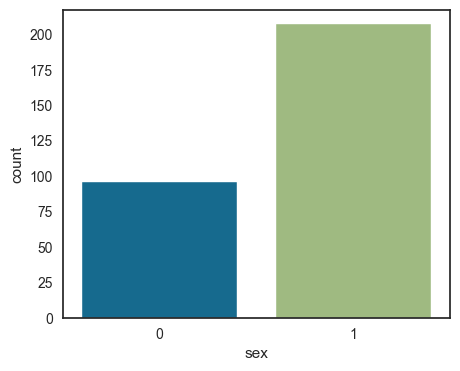

In [143]:
x=(dfOG.sex.value_counts())
print(f'Number of people having sex as 1 are {x[0]} and Number of people having sex as 0 are {x[1]}')
p = sns.countplot(data=dfOG, x='sex')
plt.show()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


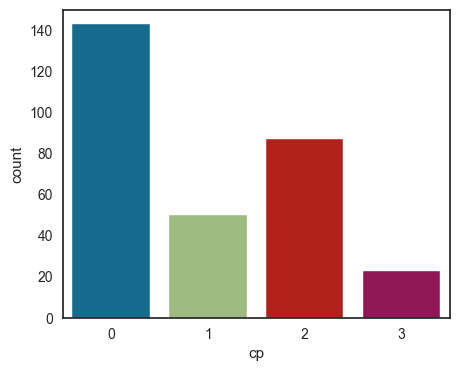

In [144]:
x=(dfOG.cp.value_counts())
print(x)
p = sns.countplot(data=dfOG, x='cp')
plt.show()

0    258
1     45
Name: fbs, dtype: int64


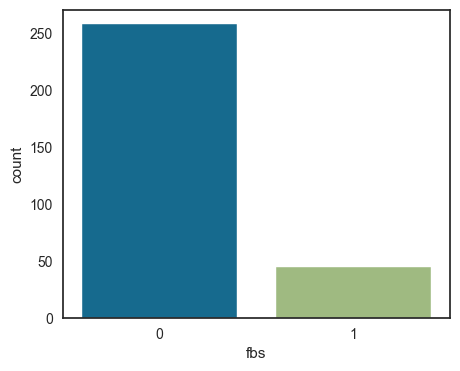

In [145]:
x=(dfOG.fbs.value_counts())
print(x)
p = sns.countplot(data=dfOG, x="fbs")
plt.show()

1    152
0    147
2      4
Name: restecg, dtype: int64


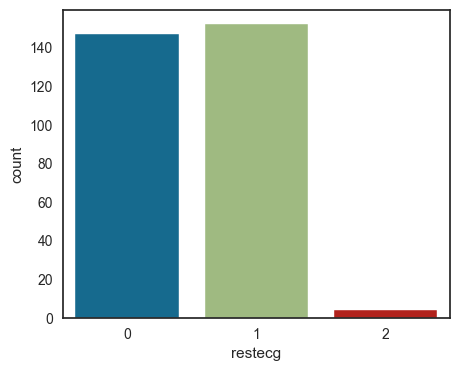

In [146]:
x=(dfOG.restecg.value_counts())
print(x)
p = sns.countplot(data=dfOG, x="restecg")
plt.show()

0    204
1     99
Name: exng, dtype: int64


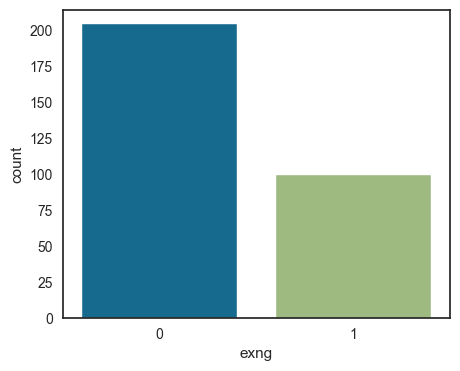

In [147]:
x=(dfOG.exng.value_counts())
print(x)
p = sns.countplot(data=dfOG, x="exng")
plt.show()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64


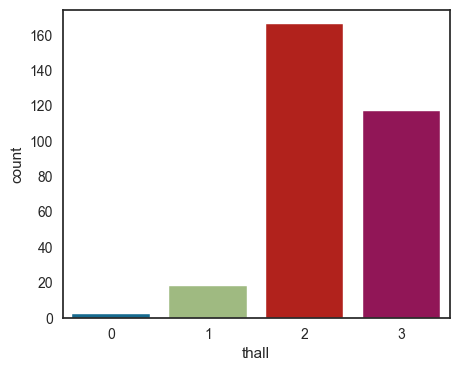

In [148]:
x=(dfOG.thall.value_counts())
print(x)
p = sns.countplot(data=dfOG, x="thall")
plt.show()

<Figure size 1000x1000 with 0 Axes>

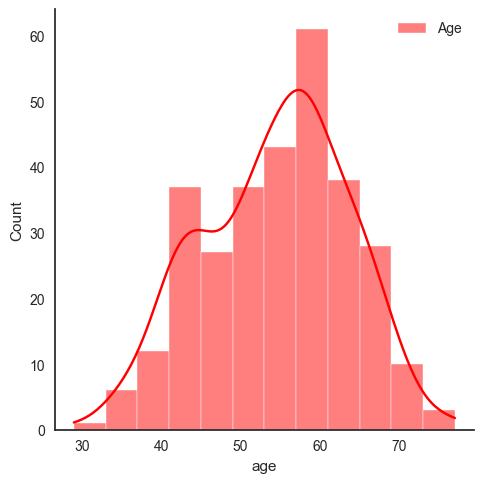

In [149]:
plt.figure(figsize=(10,10))
sns.displot(dfOG.age, color="red", label="Age", kde= True)
plt.legend()

<Figure size 2000x2000 with 0 Axes>

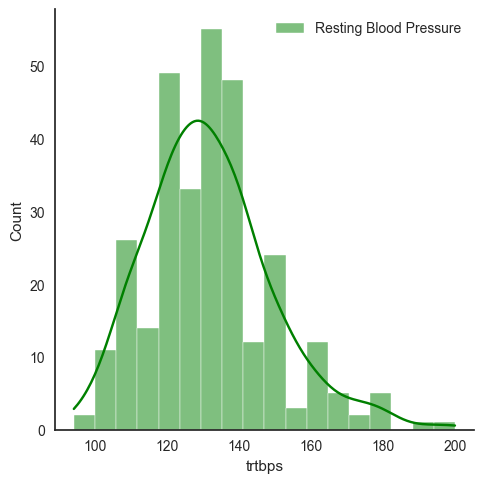

In [150]:
plt.figure(figsize=(20,20))
sns.displot(dfOG.trtbps , color="green", label="Resting Blood Pressure", kde= True)
plt.legend()

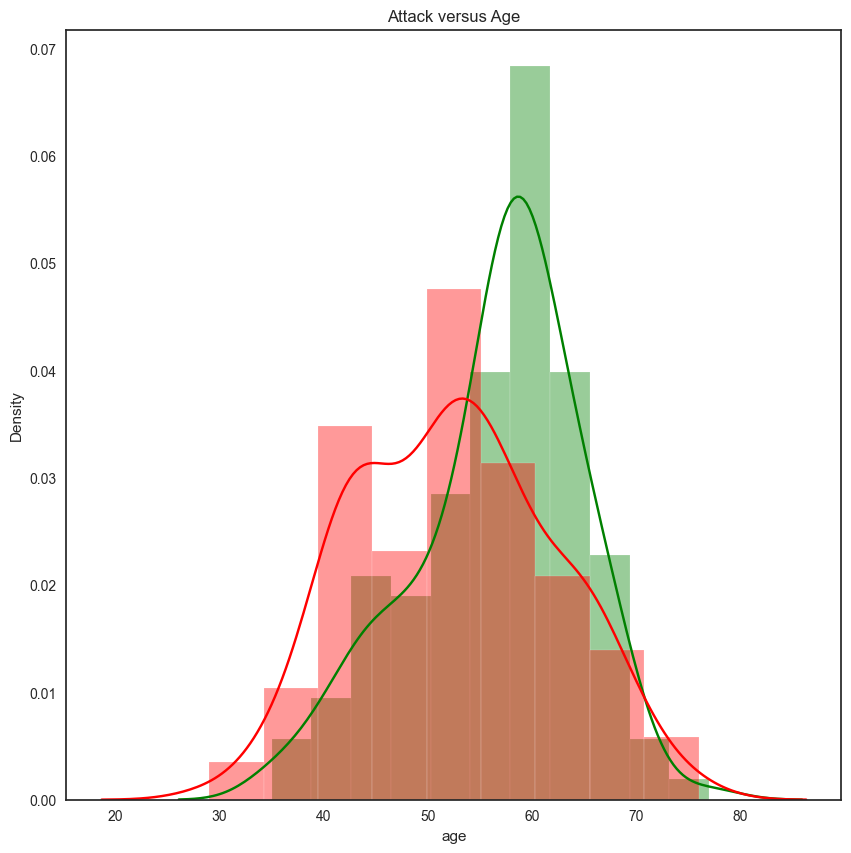

In [151]:
plt.figure(figsize=(10,10))
sns.distplot(dfOG[dfOG['output'] == 0]["age"], color='green',kde=True,)
sns.distplot(dfOG[dfOG['output'] == 1]["age"], color='red',kde=True)
plt.title('Attack versus Age')
plt.show()


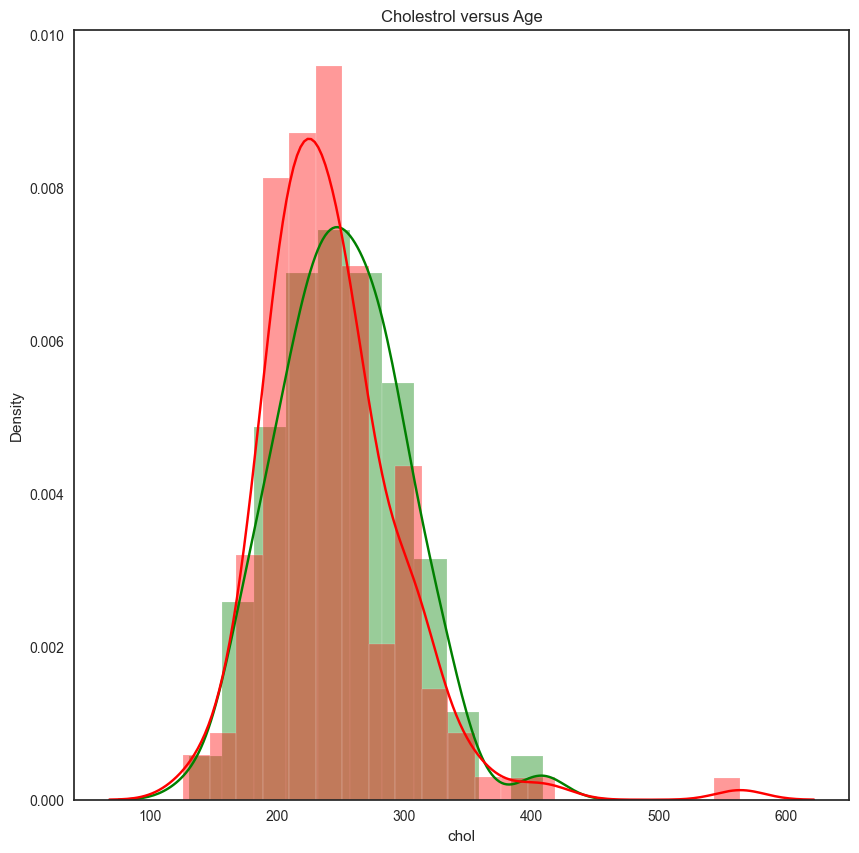

In [152]:
plt.figure(figsize=(10,10))
sns.distplot(dfOG[dfOG['output'] == 0]["chol"], color='green',kde=True,)
sns.distplot(dfOG[dfOG['output'] == 1]["chol"], color='red',kde=True)
plt.title('Cholestrol versus Age')
plt.show()

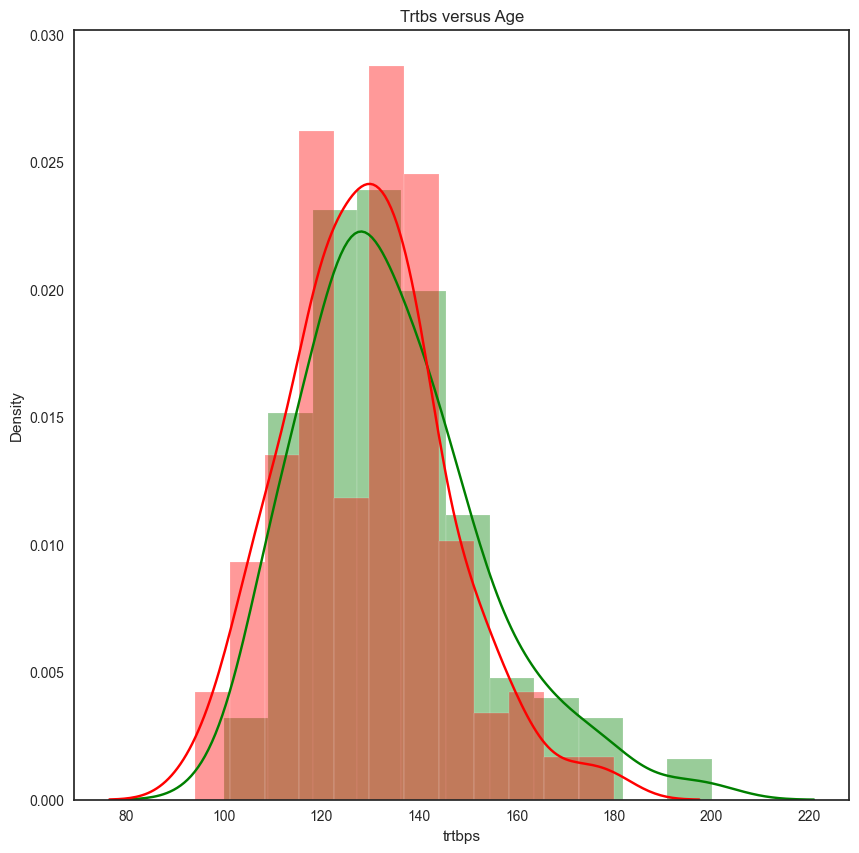

In [153]:
plt.figure(figsize=(10,10))
sns.distplot(dfOG[dfOG['output'] == 0]["trtbps"], color='green',kde=True,)
sns.distplot(dfOG[dfOG['output'] == 1]["trtbps"], color='red',kde=True)
plt.title('Trtbs versus Age')
plt.show()

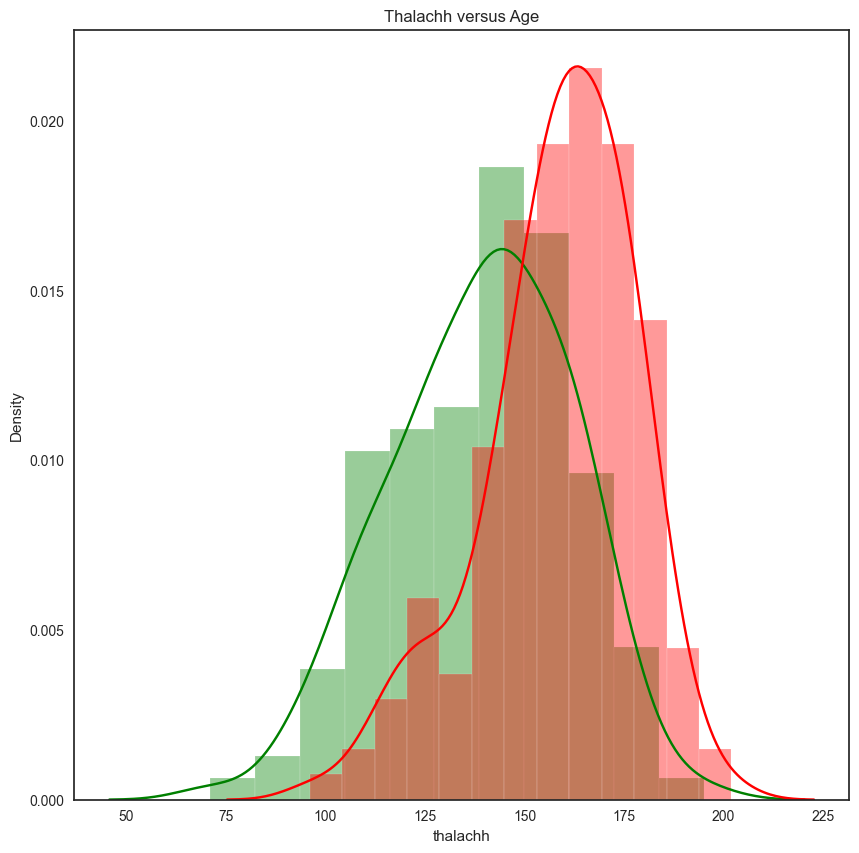

In [154]:
plt.figure(figsize=(10,10))
sns.distplot(dfOG[dfOG['output'] == 0]["thalachh"], color='green',kde=True,)
sns.distplot(dfOG[dfOG['output'] == 1]["thalachh"], color='red',kde=True)
plt.title('Thalachh versus Age')
plt.show()

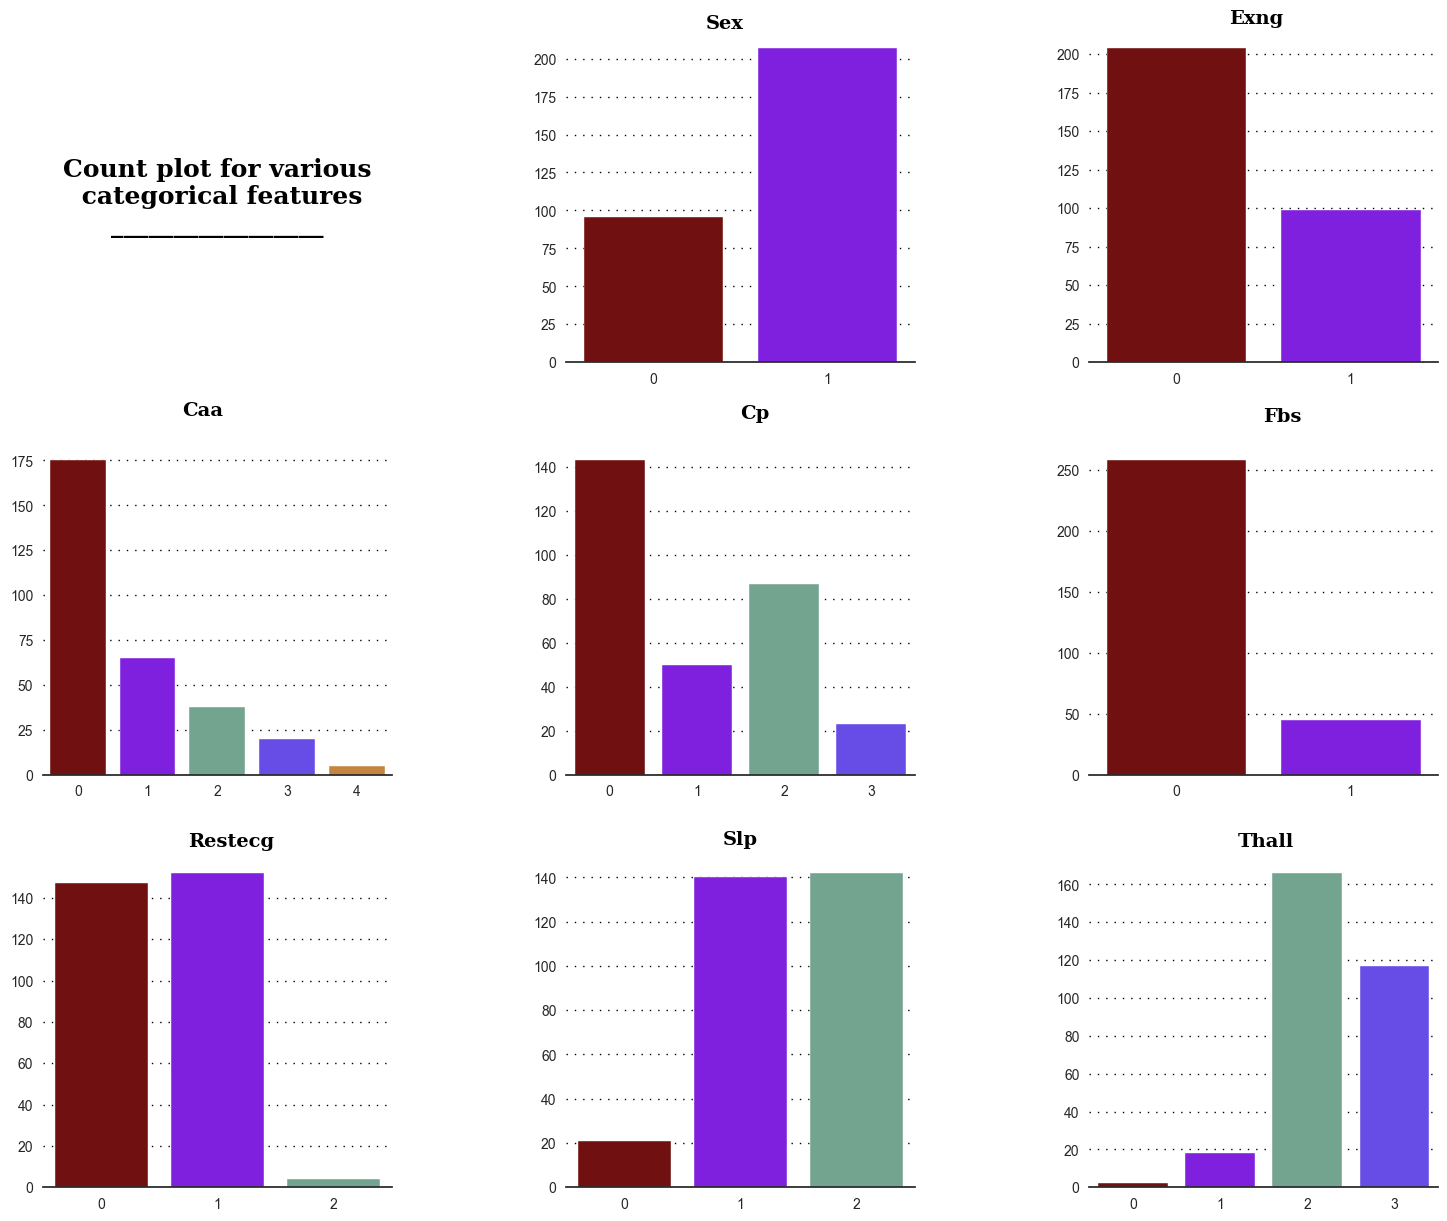

In [155]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

# Background color
#White #ffffff
background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=dfOG,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=dfOG,x='exng',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'Caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=dfOG,x='caa',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=dfOG,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=dfOG,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=dfOG,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=dfOG,x='slp',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=dfOG,x='thall',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

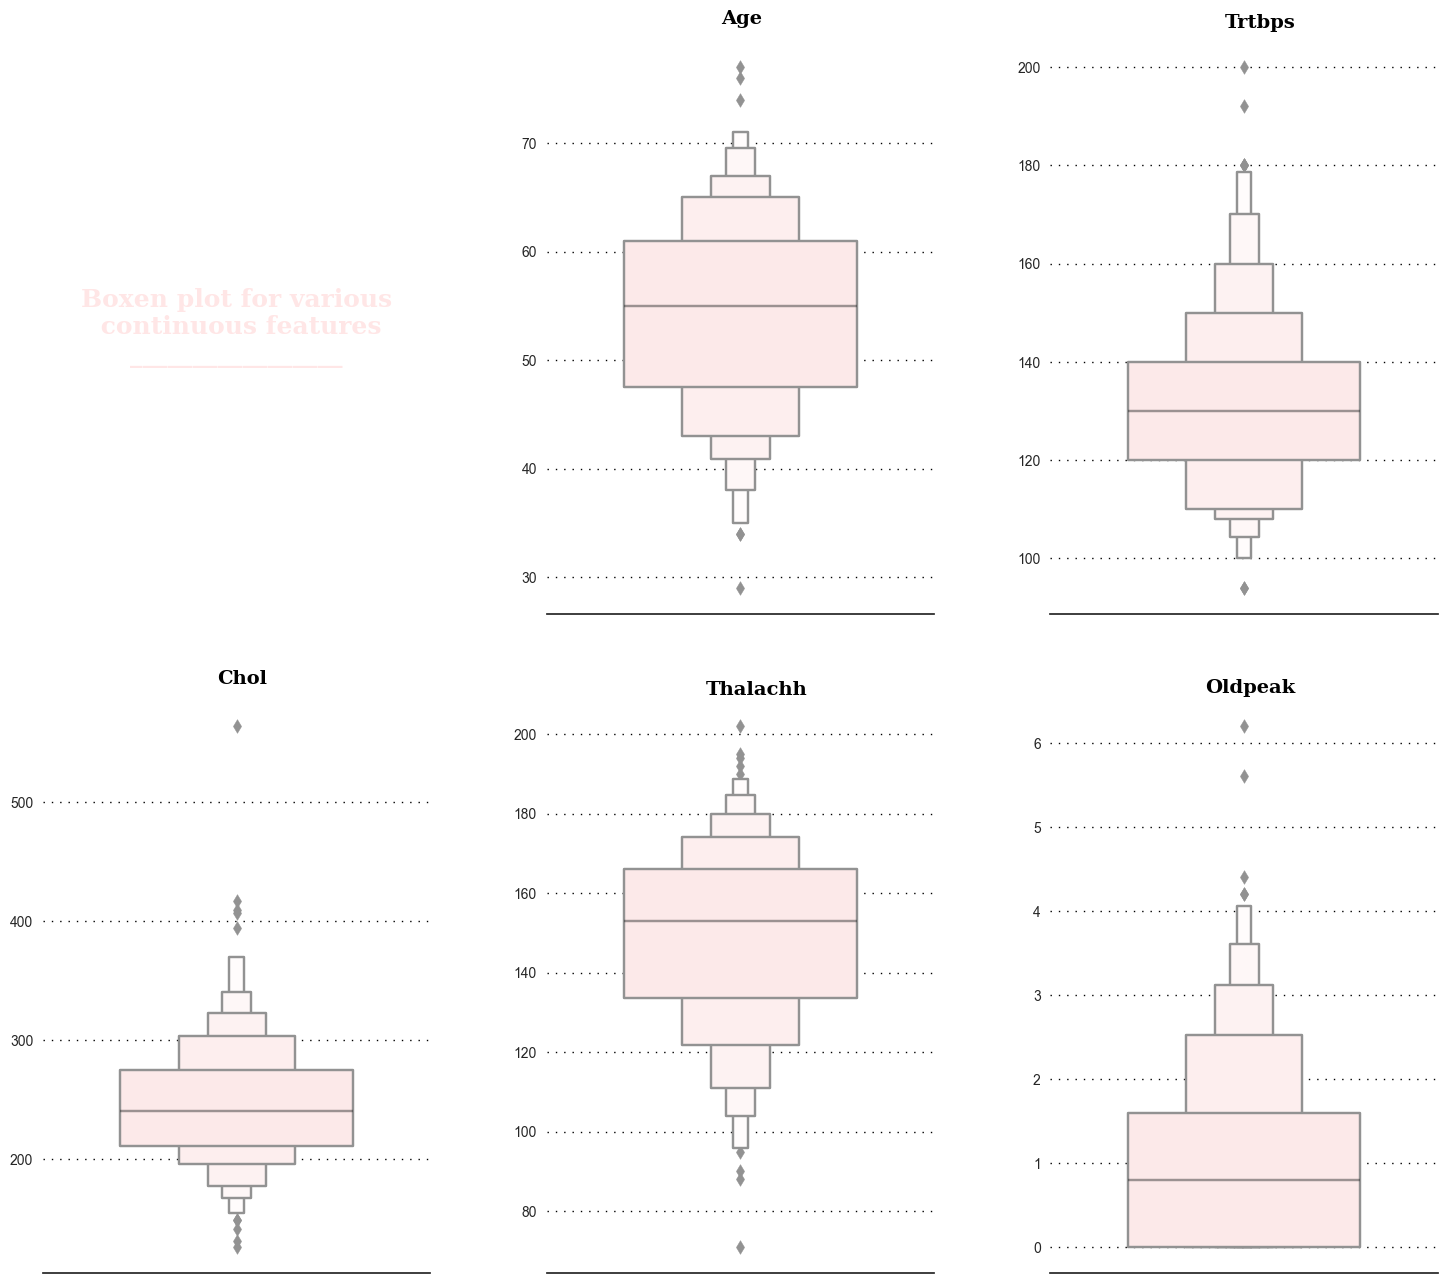

In [156]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#ffffff"
color_palette = ["#ffe6e6","#ffe6e6","#ffe6e6","#ffe6e6","#ffe6e6"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#ffe6e6")

# Age
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=dfOG['age'],palette=["#ffe6e6"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps
ax2.text(-0.05, 208, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=dfOG['trtbps'],palette=["#ffe6e6"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol
ax3.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=dfOG['chol'],palette=["#ffe6e6"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh
ax4.text(-0.09, 210, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=dfOG['thalachh'],palette=["#ffe6e6"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=dfOG['oldpeak'],palette=["#ffe6e6"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

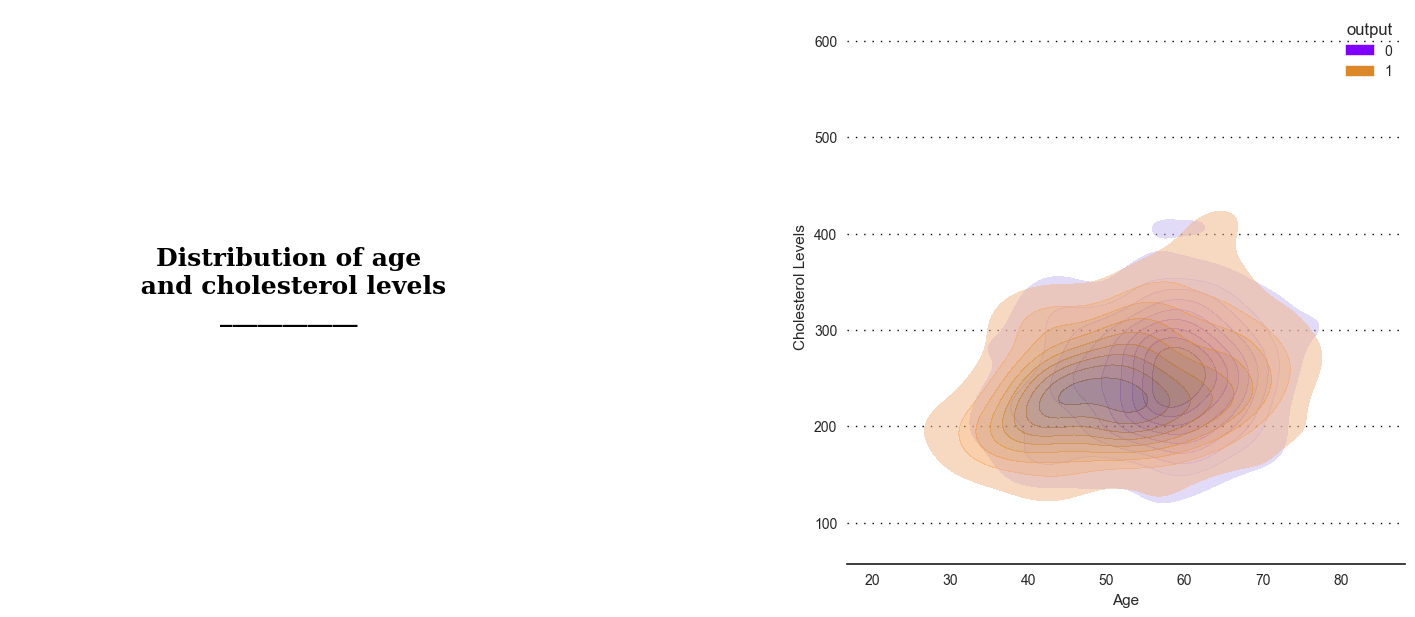

In [157]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])


background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)


# Age title
ax0.text(0.5,0.5,"Distribution of age\n and cholesterol levels\n___________",
         horizontalalignment = 'center',
         verticalalignment = 'center',
         fontsize = 18,
         fontweight='bold',
         fontfamily='serif',
         color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=dfOG, x='age',y=dfOG['chol'],hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("Age")
ax1.set_ylabel("Cholesterol Levels")



for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)





Correlation between Age and Cholesterol is : 0.2136779565595619


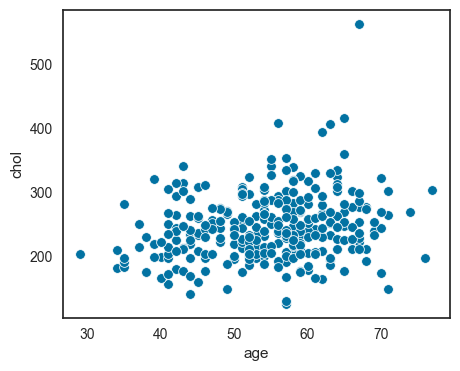

In [158]:
sns.scatterplot(x=dfOG['age'],y=dfOG['chol'])
print("Correlation between Age and Cholesterol is :", dfOG["age"].corr(dfOG["chol"]))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


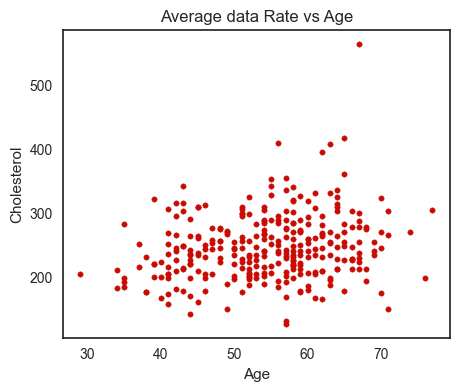

In [159]:
plt.scatter(x=dfOG['age'],y=dfOG['chol'],c='r',s=15)
plt.legend()
plt.title('Average data Rate vs Age')
plt.xlabel("Age")
plt.ylabel("Cholesterol")
ax1.set_ylabel("Cholesterol Levels")
plt.show()

<AxesSubplot: xlabel='age'>

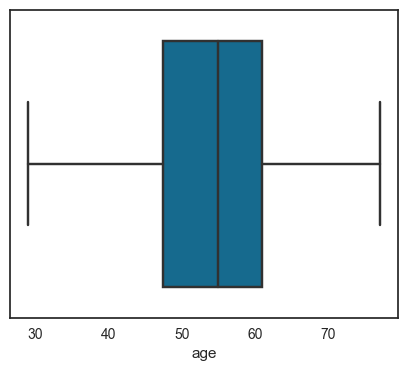

In [160]:
sns.boxplot(x=dfOG['age'])

<AxesSubplot: xlabel='chol'>

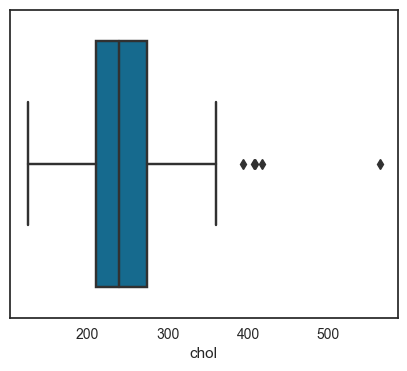

In [161]:
sns.boxplot(x=dfOG['chol'])

<AxesSubplot: xlabel='age', ylabel='chol'>

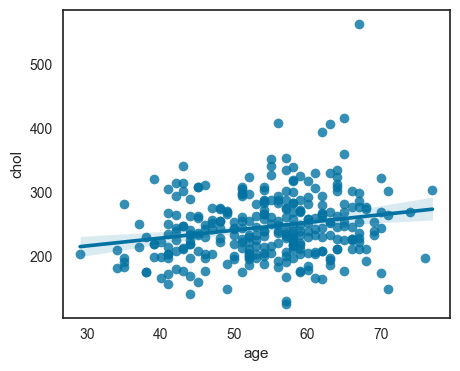

In [162]:
sns.regplot(x='age',y='chol',data=dfOG,fit_reg=True)

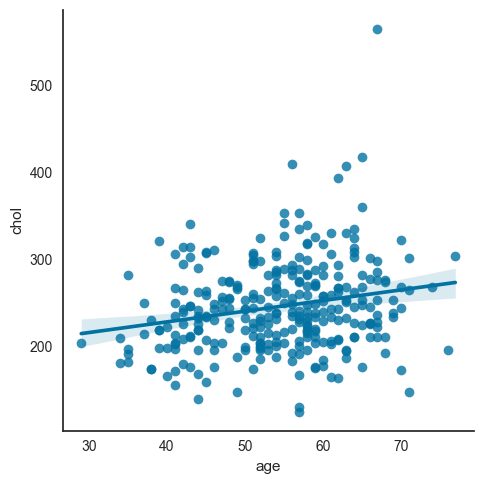

In [163]:
sns.lmplot(x='age',y='chol',data=dfOG)

In [164]:
ageGroups = pd.cut(dfOG['age'], 5)

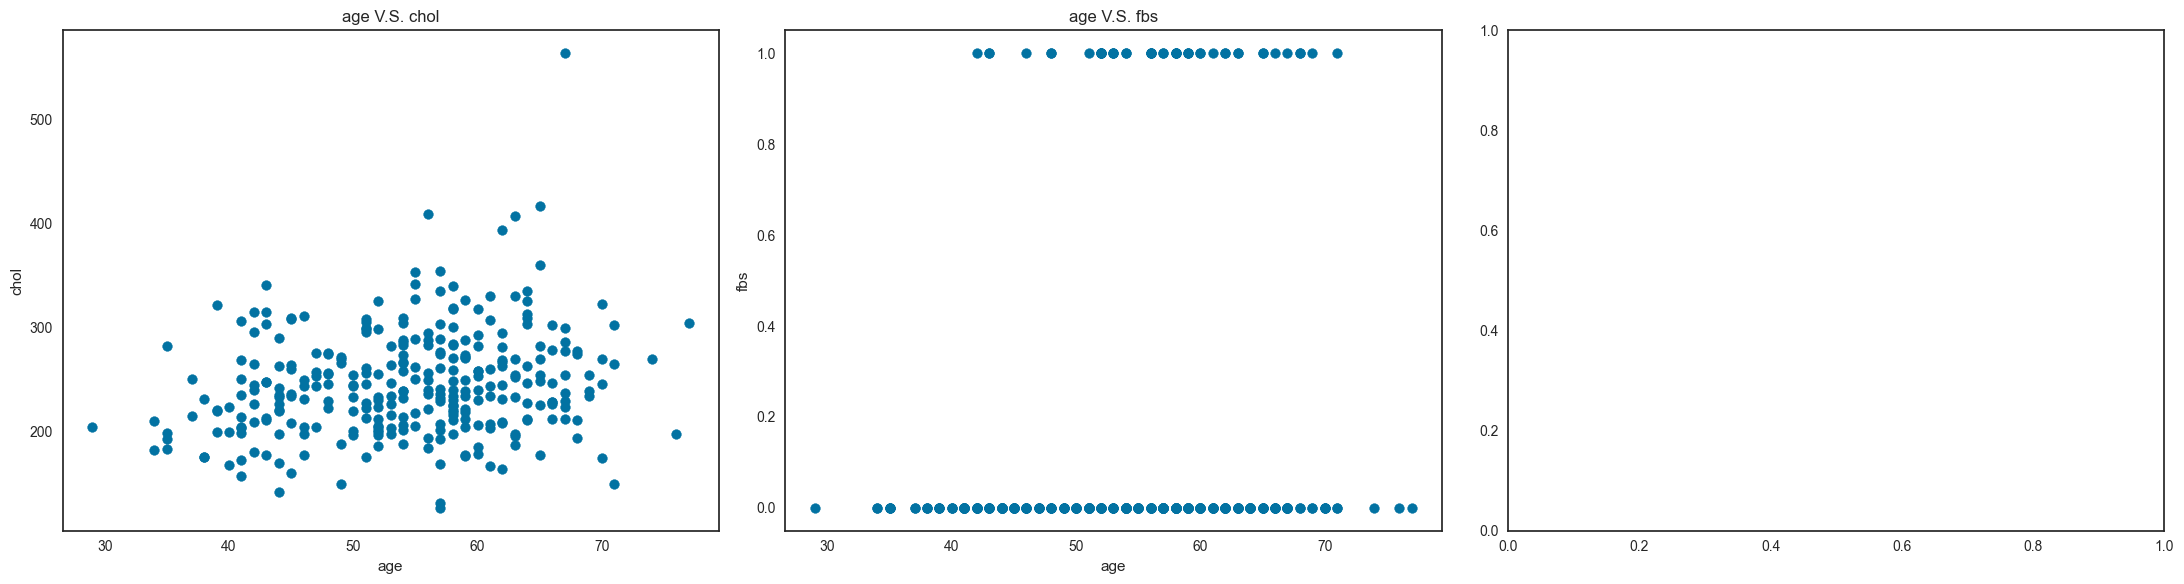

In [165]:
fig = plt.figure(figsize=(22,6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.scatter('age','chol',data=dfOG)
ax1.set(title='age V.S. chol', ylabel='chol',xlabel='age')
ax2.scatter('age','fbs',data=dfOG)
ax2.set(title='age V.S. fbs', ylabel='fbs',xlabel='age')
# ax3.scatter('age','trestbps',data=dfOG)
# ax3.set(title='age V.S. cp', ylabel='trestbps',xlabel='age')
plt.tight_layout()
plt.show()

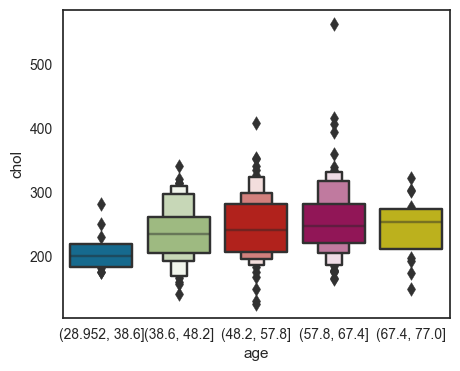

In [166]:
sns.boxenplot(x=ageGroups, y="chol", data=dfOG)
plt.show()

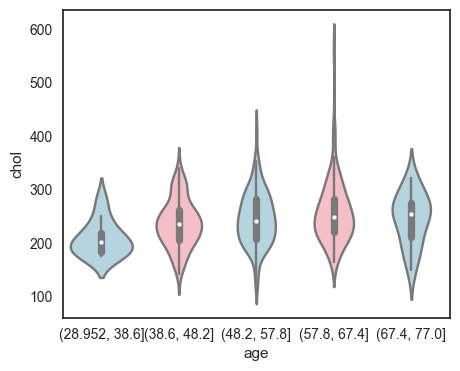

In [167]:

sns.violinplot(x=ageGroups, y="chol", palette=["lightblue", "lightpink"], data=dfOG)
plt.show()

<AxesSubplot: xlabel='age', ylabel='restecg'>

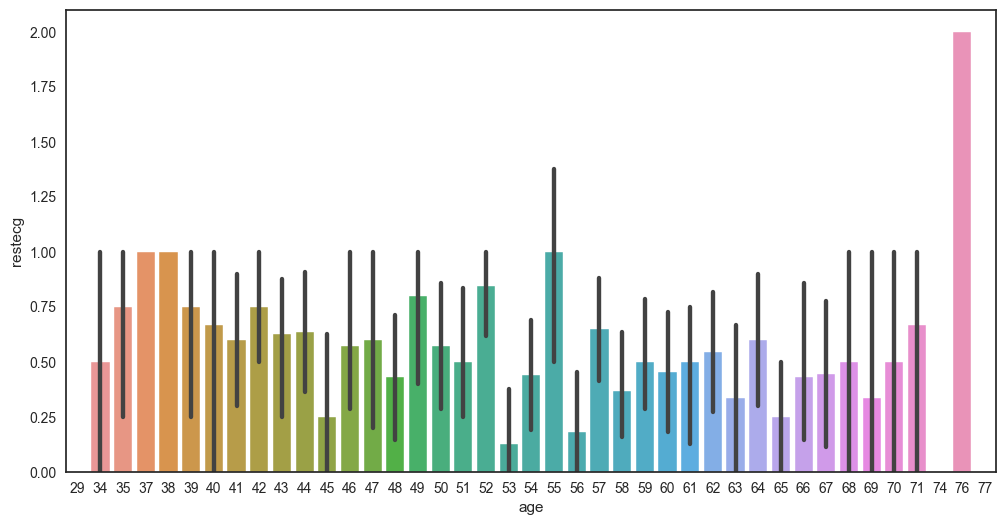

In [168]:
plt.figure(figsize=(12,6))

sns.barplot(y =dfOG['restecg'], x =dfOG['age'])

Augment the Dataset to Add more Values

In [169]:
#AUGMENT THE DATA
#Generate 1000 new rows of data
augmentedData = dfOG.sample(n=5000, replace=True, random_state=529)

#Add the new rows to the original data
dfOG = dfOG.append(augmentedData)

#Shuffle the data
dfOG = dfOG.sample(frac=1, random_state=529).reset_index(drop=True)


In [170]:
#Split the data into training and testing

#Split into two csv files for training and testing
df_train = dfOG.sample(frac=0.8, random_state=42)
df_test = dfOG.drop(df_train.index)

#Save the dataframes to csv files
df_train.to_csv('heart_train.csv', index=False)
df_test.to_csv('heart_test.csv', index=False)





In [171]:
df_train = pd.read_csv('heart_train.csv')
df_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,54,1,1,108,309,0,1,156,0,0.0,2,0,3,1
1,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
2,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
3,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
4,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0


In [172]:
df_test = pd.read_csv('heart_test.csv')
df_test.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,51,1,2,100,222,0,1,143,1,1.2,1,0,2,1
1,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
2,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
3,62,0,2,130,263,0,1,97,0,1.2,1,1,3,0
4,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1


In [173]:
df_train2 = df_train[['age','sex','chol','thalachh','output']]
df_train2

,age,sex,chol,thalachh,output
0,54,1,309,156,1
1,43,1,247,143,0
2,58,1,318,140,0
3,45,0,234,175,1
4,61,0,330,169,0
...,...,...,...,...,...
4237,54,1,232,165,1
4238,47,1,275,118,0
4239,43,1,315,162,1
4240,67,1,286,108,0


In [174]:
df_test2 = df_test[['age','sex','chol','thalachh','output']]
df_test2

,age,sex,chol,thalachh,output
0,51,1,222,143,1
1,58,1,218,105,0
2,62,1,267,99,0
3,62,0,263,97,0
4,60,0,240,171,1
...,...,...,...,...,...
1056,67,0,277,172,1
1057,61,1,207,138,0
1058,35,1,198,130,0
1059,40,1,167,114,0


In [175]:
df_train2_np = df_train2.to_numpy()
X_train, y_train = df_train2_np[:, :-1], df_train2_np[:, -1]
X_train.shape, y_train.shape

((4242, 4), (4242,))

Models


In [176]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

#train the model
model = LinearSVC()
model.fit(X_train, y_train)




LinearSVC()

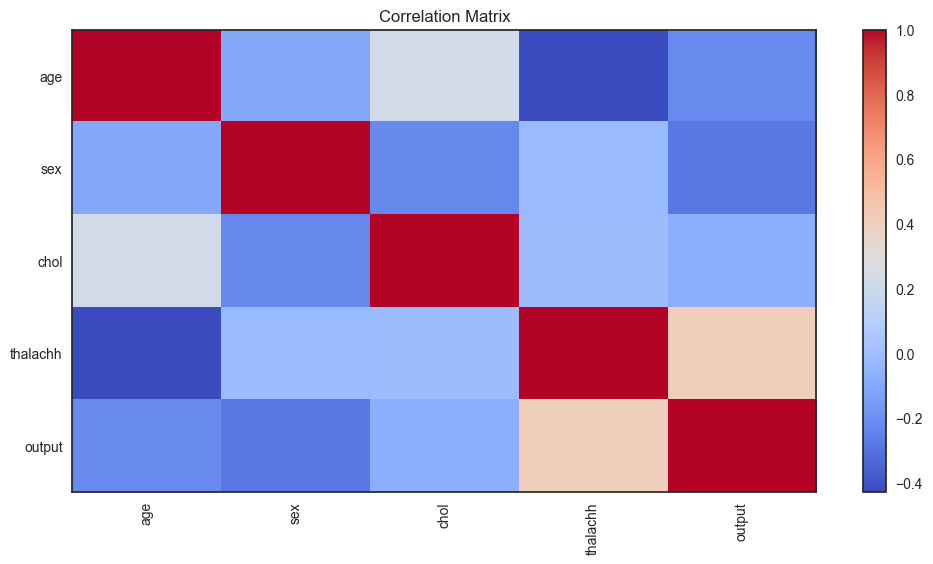

In [177]:
#Generate a correlation matrix
corr = df_train2.corr()

#plot the correlation matrix
plt.figure(figsize=(12,6))
plt.title('Correlation Matrix')
plt.imshow(corr,cmap='coolwarm',interpolation='none',aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns,rotation='vertical')
plt.yticks(range(len(corr)),corr.columns)
plt.show()

In [178]:
from sklearn.cluster import KMeans

print (df_train2.head())


   age  sex  chol  thalachh  output
0   54    1   309       156       1
1   43    1   247       143       0
2   58    1   318       140       0
3   45    0   234       175       1
4   61    0   330       169       0


In [179]:
df_train2.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4242 entries, 0 to 4241
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       4242 non-null   int64
 1   sex       4242 non-null   int64
 2   chol      4242 non-null   int64
 3   thalachh  4242 non-null   int64
 4   output    4242 non-null   int64
dtypes: int64(5)
memory usage: 165.8 KB


In [180]:
plt.figure()

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

In [181]:
dataCopy = df_train2.copy()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

dataScaled = scaler.fit_transform(dataCopy)

dataScaled = pd.DataFrame(dataScaled, columns=dataCopy.columns)
dataScaled.head()


,age,sex,chol,thalachh,output
0,-0.027101,0.705232,1.228414,0.259031,0.893431
1,-1.230335,0.705232,0.028831,-0.299701,-1.119280
2,0.410438,0.705232,1.402547,-0.428639,-1.119280
3,-1.011565,-1.417972,-0.222695,1.075640,0.893431
4,0.738593,-1.417972,1.634725,0.817764,-1.119280


In [182]:
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA

pca = SparsePCA(n_components=3)

dataPCA = pca.fit_transform(dataScaled)

dataPCA = pd.DataFrame(dataPCA, columns=['PC1', 'PC2', 'PC3'])

dataPCA.head()

,PC1,PC2,PC3
0,0.537590,-0.051071,1.029033
1,0.226902,-1.450104,-0.049786
2,-0.966880,-0.854466,1.414773
3,1.532486,1.212219,-0.135507
4,-0.602871,0.895056,2.082159


In [183]:
dataPCA.describe()

,PC1,PC2,PC3
count,4.242000e+03,4.242000e+03,4.242000e+03
mean,-2.010022e-17,-1.340015e-17,-1.675018e-17
std,1.297872e+00,1.114922e+00,1.025632e+00
min,-3.488249e+00,-1.768615e+00,-2.261451e+00
25%,-9.407084e-01,-9.025242e-01,-6.690792e-01
50%,-4.340824e-02,-3.416873e-01,-7.686258e-02
75%,8.925324e-01,9.524836e-01,5.148489e-01
max,3.703658e+00,2.521550e+00,6.104667e+00


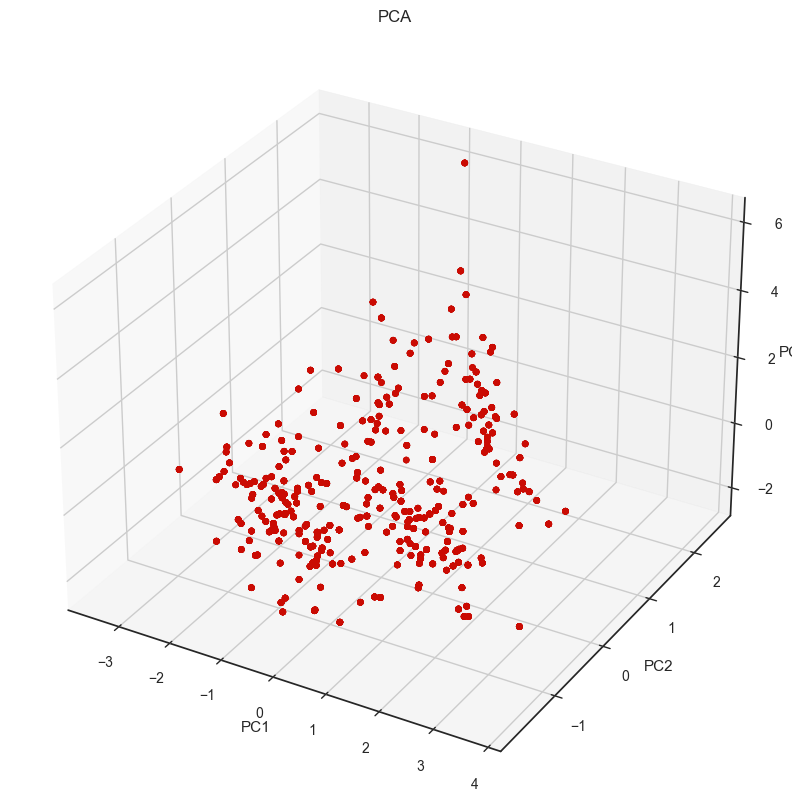

In [184]:
#Plot the data in 3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataPCA['PC1'], dataPCA['PC2'], dataPCA['PC3'], c='r', marker='o')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA')
plt.show()


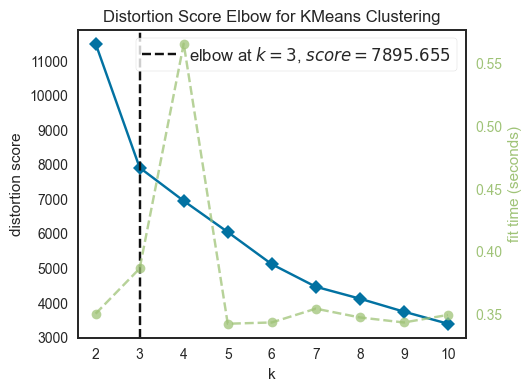

In [185]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(10))

visualizer.fit(dataPCA)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


clusterCount = visualizer.elbow_value_


In [186]:
print (clusterCount)

3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


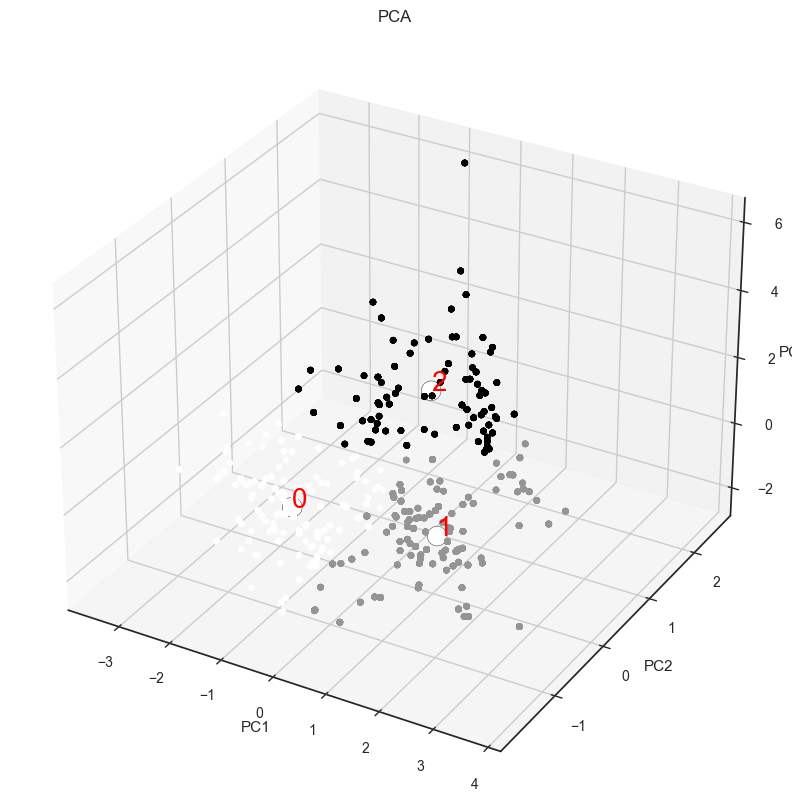

In [187]:
model = KMeans(n_clusters=clusterCount)
prediction = model.fit_predict(dataPCA)

dataPCA['Cluster'] = prediction

x,y,z = dataPCA['PC1'], dataPCA['PC2'], dataPCA['PC3']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x, y, z, c=dataPCA['Cluster'], marker='o')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')


# Identify the cluster centers
centers = model.cluster_centers_
# Draw white circles at cluster centers
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],
           c='white', alpha=1, s=200, edgecolor='k')


# Identify what each cluster represents
for i, c in enumerate(centers):
    ax.text(c[0], c[1], c[2], str(i), fontsize=20, color='red')






ax.legend()
plt.title('PCA')
plt.show()


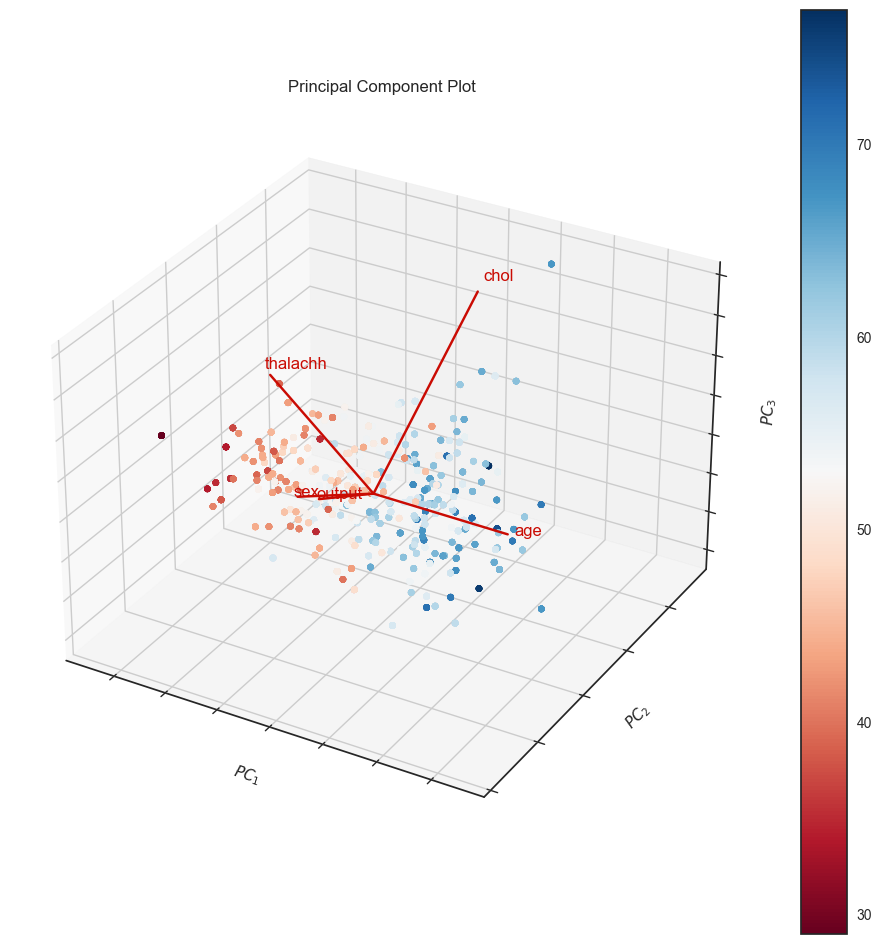

<Axes3DSubplot: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

In [188]:
from yellowbrick.features import PCA

X, y = df_train2, df_train2['age']

# Make the graph larger.
plt.figure(figsize=(12, 12))

visualizer = PCA(scale=True, proj_features=True, projection=3)

visualizer.fit_transform(X, y)
visualizer.show()

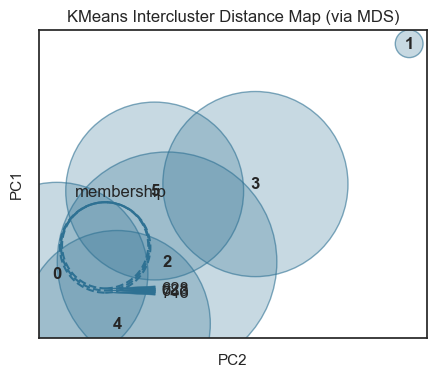

<AxesSubplot: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [189]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import InterclusterDistance

X, y = df_train2, df_train2['age']

# Instantiate the clustering model and visualizer
model = KMeans(6)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

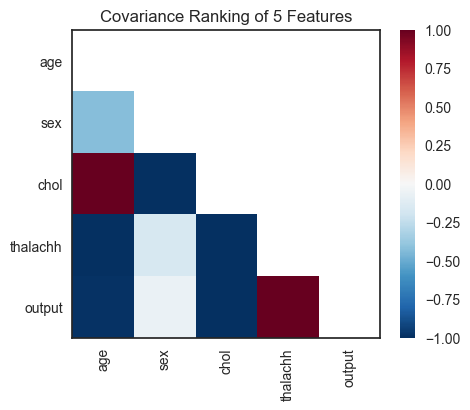

<AxesSubplot: title={'center': 'Covariance Ranking of 5 Features'}>

In [190]:
#Utilise Yellowbrick to visualise the data
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(algorithm='covariance')

visualizer.fit(df_train2)           # Fit the data to the visualizer
visualizer.transform(df_train2)        # Transform the data

visualizer.poof()        # Draw/show/poof the data




In [191]:
from sklearn.metrics import r2_score
from skimage.metrics import mean_squared_error


#Create evaluations depending on the model used.

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R2: {r2:.2f}')


#ROC Curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

def plot_roc_curve(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10, 10))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()



def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()





In [192]:
def bestError(trainError,modelName):
    bestError = 100
    bestModel = ""
    if trainError < bestError:
            bestError = trainError
            bestModel = modelName


def getBestModel(bestModel=None):
    return  bestModel,bestError


0.37497031790599455
MAE: 0.37
MSE: 0.18
RMSE: 0.43
R2: 0.26


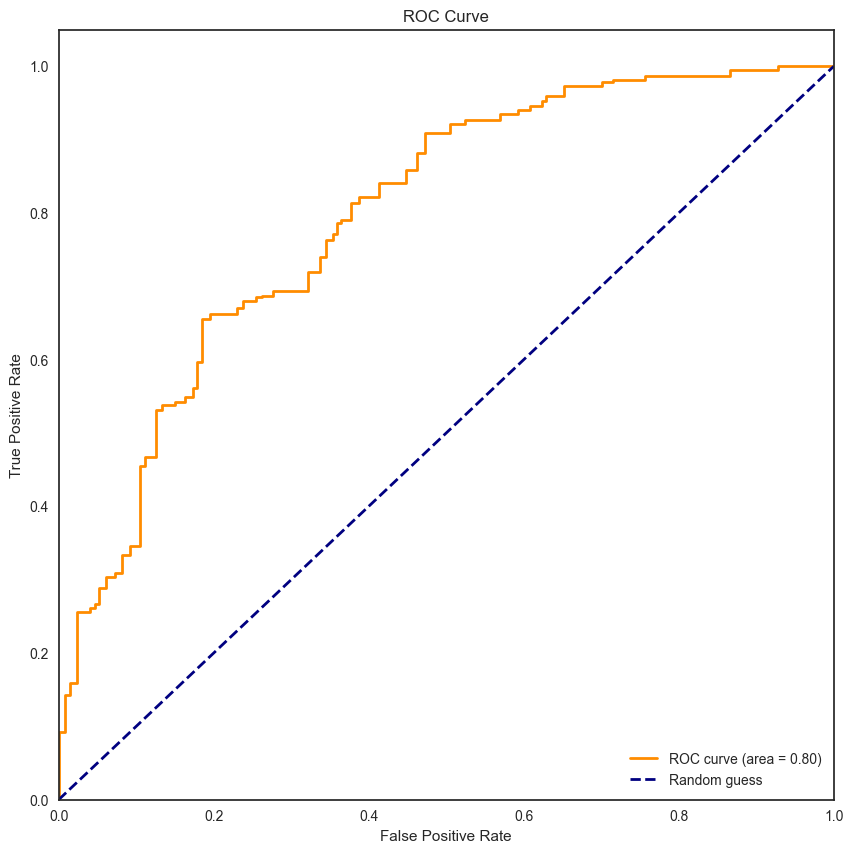

In [193]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

linear_model = LinearRegression().fit(X_train, y_train)
linear_train_preds = linear_model.predict(X_train)
print(mean_absolute_error(linear_train_preds, y_train))
evaluate_model(y_train, linear_train_preds)
plot_roc_curve(y_train, linear_train_preds)


In [194]:
df_test2_np = df_test2.to_numpy()
X_test, y_test = df_test2_np[:, :-1], df_test2_np[:, -1]
X_test.shape, y_test.shape


((1061, 4), (1061,))

0.38487923829208737
MAE: 0.38
MSE: 0.19
RMSE: 0.44
R2: 0.24


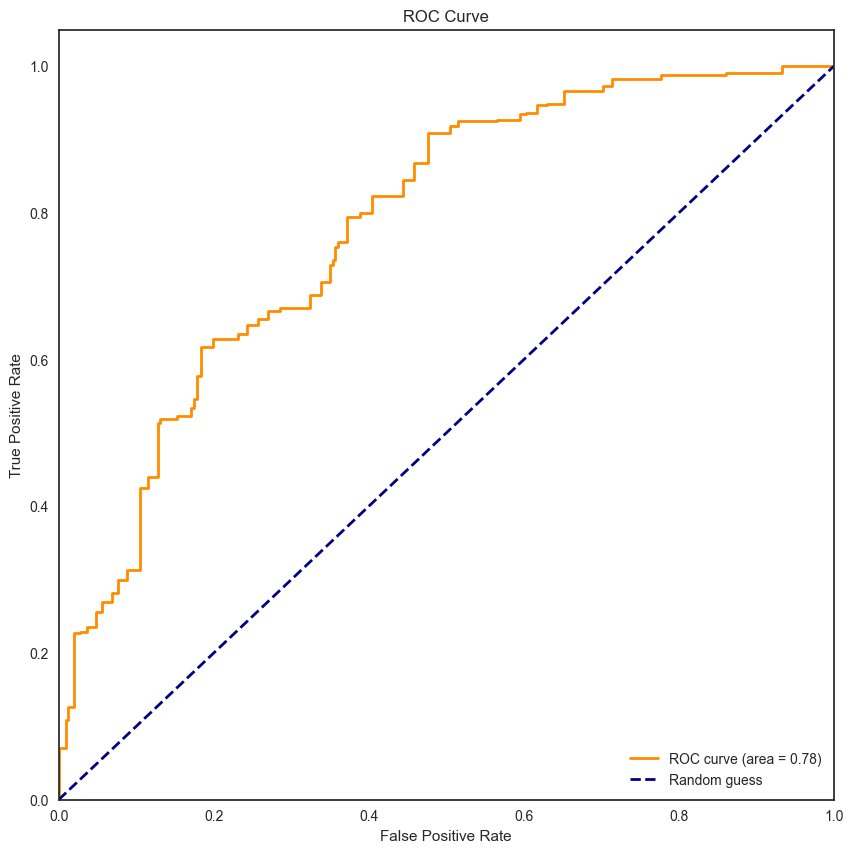

In [195]:
linear_test_preds = linear_model.predict(X_test)
print(mean_absolute_error(linear_test_preds,y_test))
evaluate_model(y_test, linear_test_preds)
plot_roc_curve(y_test, linear_test_preds)


0.37497031790599455
MAE: 0.37
MSE: 0.18
RMSE: 0.43
R2: 0.26


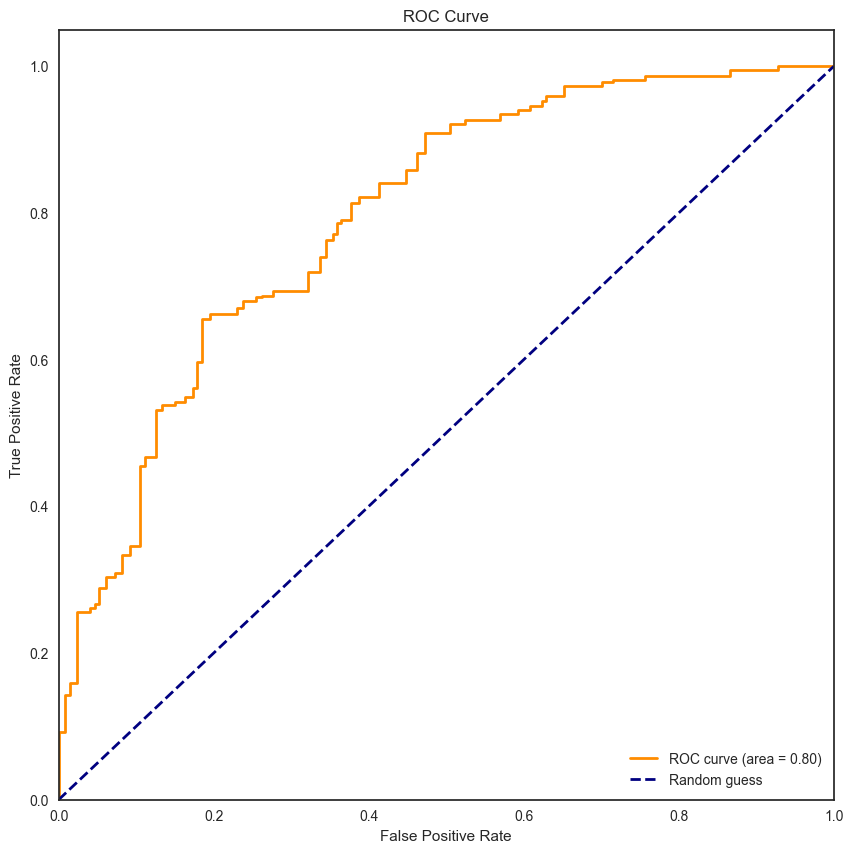

In [196]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

linear_model = LinearRegression().fit(X_train, y_train)
linear_train_preds = linear_model.predict(X_train)
print(mean_absolute_error(linear_train_preds, y_train))

#Evaluate the model
evaluate_model(y_train, linear_train_preds)
plot_roc_curve(y_train, linear_train_preds)



MAE: 0.24
MSE: 0.11
RMSE: 0.32
R2: 0.58


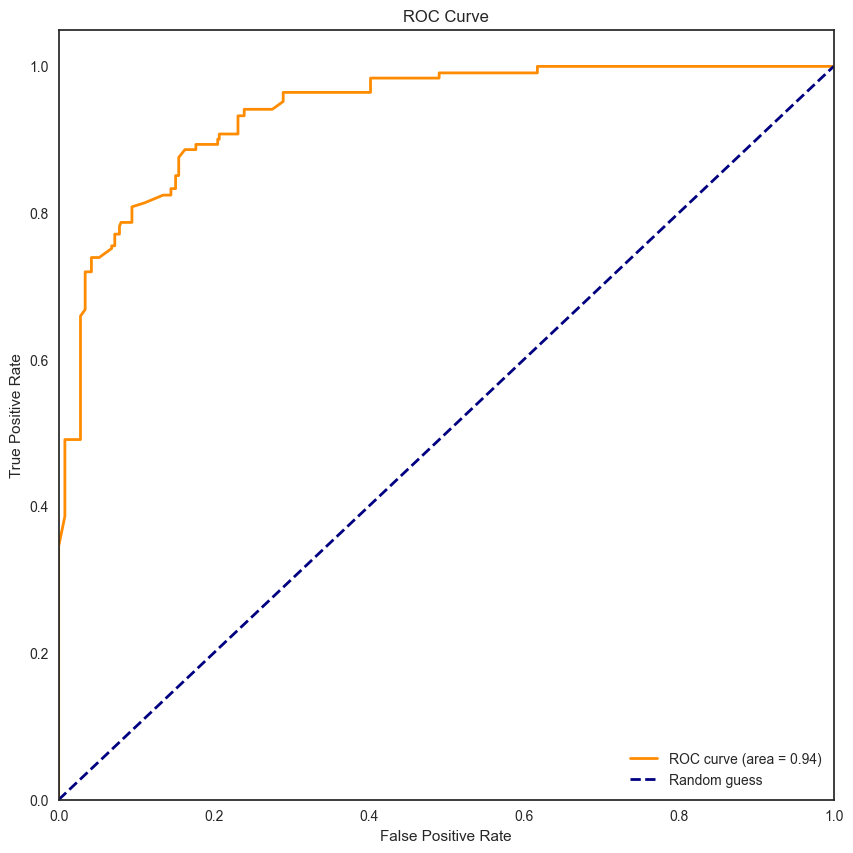

In [197]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)

trainError = mean_absolute_error(rf_train_preds, y_train)
testError = mean_absolute_error(rf_test_preds, y_test)
evaluate_model(y_test, rf_test_preds)
plot_roc_curve(y_test, rf_test_preds)
bestError(testError,"Random Forest")
#Evaluate the model


0.22008573508839316 0.23194844711452137
MAE: 0.23
MSE: 0.09
RMSE: 0.29
R2: 0.66


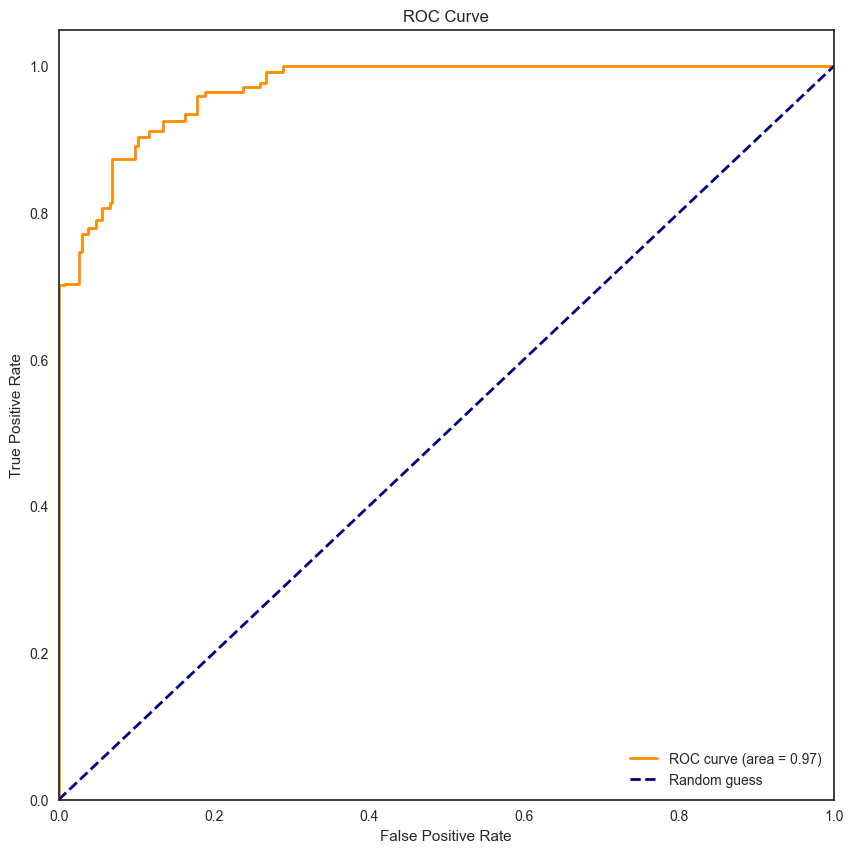

In [198]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
gb_train_preds = gb.predict(X_train)
gb_test_preds = gb.predict(X_test)

trainError = mean_absolute_error(gb_train_preds, y_train)
testError = mean_absolute_error(gb_test_preds, y_test)
print(trainError, testError)
evaluate_model(y_test, gb_test_preds)
plot_roc_curve(y_test, gb_test_preds)

bestError(testError,"Gradient Boosting")



MAE: 0.34
MSE: 0.17
RMSE: 0.41
R2: 0.34


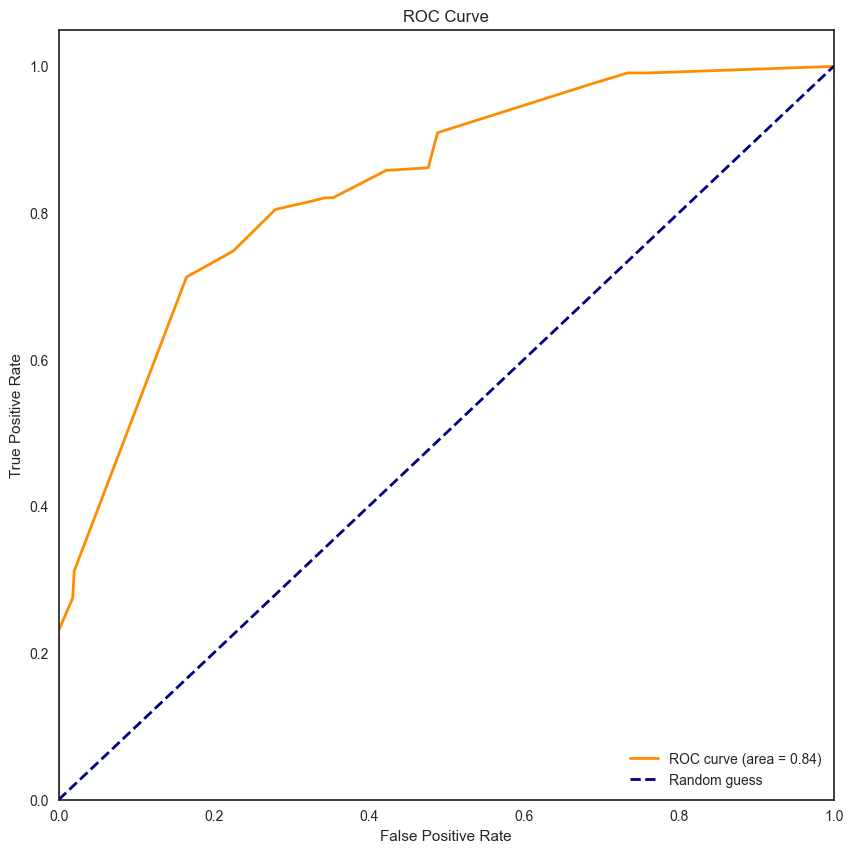

In [199]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=100, random_state=42,learning_rate=1)
ada.fit(X_train, y_train)
ada_train_preds = ada.predict(X_train)
ada_test_preds = ada.predict(X_test)

trainError = mean_absolute_error(ada_train_preds, y_train)
testError = mean_absolute_error(ada_test_preds, y_test)
evaluate_model(y_test, ada_test_preds)
plot_roc_curve(y_test, ada_test_preds)
bestError(testError,"Ada Boosting")




MAE: 0.38
MSE: 0.22
RMSE: 0.47
R2: 0.11


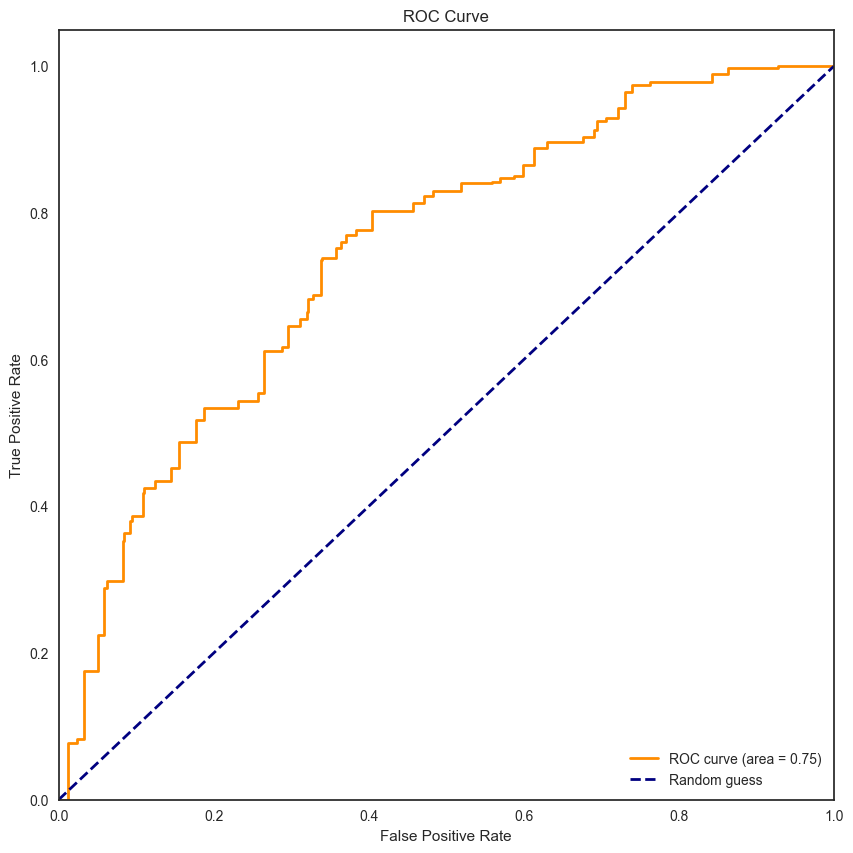

In [200]:
#What other models can we use?
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
svr_train_preds = svr.predict(X_train)
svr_test_preds = svr.predict(X_test)

trainError = mean_absolute_error(svr_train_preds, y_train)
testError = mean_absolute_error(svr_test_preds, y_test)
evaluate_model(y_test, svr_test_preds)
plot_roc_curve(y_test, svr_test_preds)
bestError(testError,"Support Vector Regression")

MAE: 0.00
MSE: 0.00
RMSE: 0.00
R2: 1.00


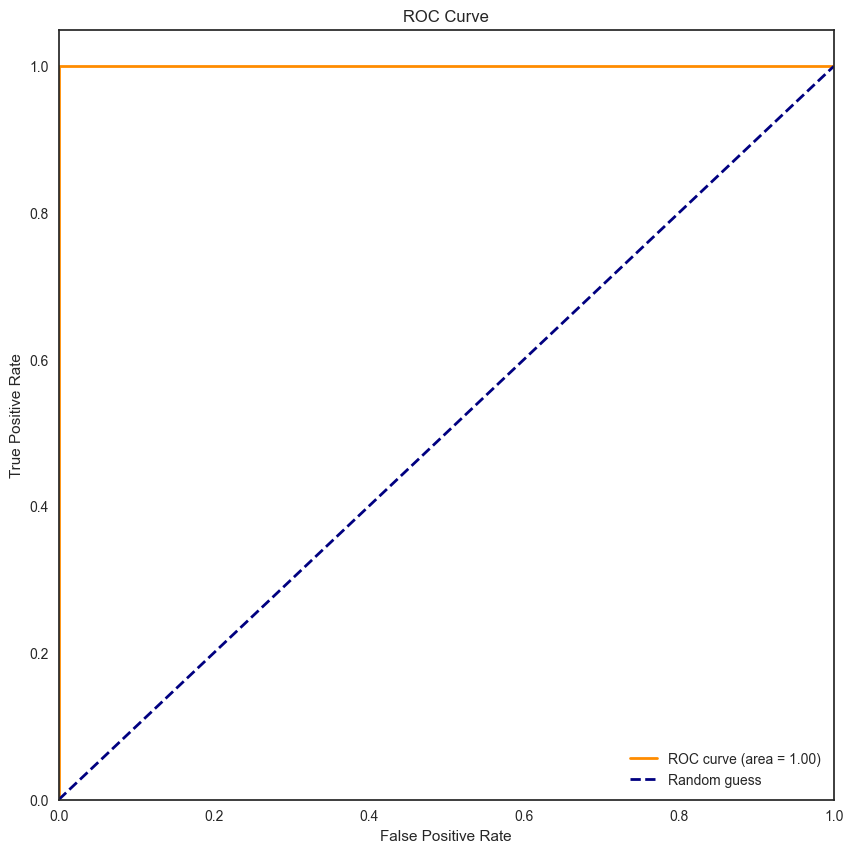

In [201]:
#What other models can we use?
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5,weights='uniform')
knn.fit(X_train, y_train)
knn_train_preds = knn.predict(X_train)
knn_test_preds = knn.predict(X_test)

trainError = mean_absolute_error(knn_train_preds, y_train)
testError = mean_absolute_error(knn_test_preds, y_test)
evaluate_model(y_test, knn_test_preds)
plot_roc_curve(y_test, knn_test_preds)
bestError(testError,"KNN Regression")

In [202]:
#Get the best error
getBestModel()




(None, <function __main__.bestError(trainError, modelName)>)

In [203]:
#Find the best model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

#Gradient Boosting
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


{'max_depth': 15, 'n_estimators': 200}

In [204]:
#Random Forest
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


{'max_depth': 15, 'n_estimators': 100}

In [205]:
#AdaBoost grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.5, 1]
}

grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
grid_search.best_params_


Fitting 3 folds for each of 9 candidates, totalling 27 fits


{'learning_rate': 0.5, 'n_estimators': 100}

In [206]:
#KNN grid search
param_grid = {
    'n_neighbors': [5, 10, 15],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
grid_search.best_params_


Fitting 3 folds for each of 6 candidates, totalling 18 fits


{'n_neighbors': 5, 'weights': 'distance'}

In [207]:
# #SVR grid search
# param_grid = {
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'C': [0.1, 1, 10, 100, 1000],
#     'gamma': ['scale', 'auto']
# }
#
# grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)
# grid_search.best_params_


In [208]:
from sklearn.model_selection import train_test_split

#Split into Test, Train, Val
X_val, X_hold,y_val,y_hold = train_test_split(X_test,y_test,test_size=1,random_state=42)

X_val.shape, X_hold.shape, y_val.shape, y_hold.shape



((1060, 4), (1, 4), (1060,), (1,))

In [209]:
linear_val_preds = linear_model.predict(X_val)
print(mean_absolute_error(y_train,linear_train_preds), mean_absolute_error(y_val,linear_val_preds))
evaluate_model(y_test, linear_val_preds)
plot_roc_curve(y_test, linear_val_preds)


0.37497031790599455 0.38478384646638725


ValueError: Found input variables with inconsistent numbers of samples: [1061, 1060]

In [ ]:
rf_val_preds = rf.predict(X_val)

print(mean_absolute_error(y_train,rf_train_preds),mean_absolute_error(y_val,rf_val_preds))

evaluate_model(y_test, rf_test_preds)
plot_roc_curve(y_test, rf_test_preds)